In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navendu14","key":"241686ec49cffbd92fdb90c0a7b215e1"}'}

In [ ]:
import os
import zipfile

# Make kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d edirgarcia/tabular-ember


Dataset URL: https://www.kaggle.com/datasets/edirgarcia/tabular-ember
License(s): GNU Affero General Public License 3.0
 99% 1.58G/1.60G [00:18<00:00, 311MB/s]
100% 1.60G/1.60G [00:18<00:00, 92.2MB/s]


In [ ]:
# Unzip the dataset
with zipfile.ZipFile('tabular-ember.zip', 'r') as zip_ref:
    zip_ref.extractall('ember_data')


In [ ]:
import pandas as pd

# Define chunk size
chunk_size = 50000  # You can adjust this depending on your RAM

chunks = []
max_chunks = 20  # Load only first 4 chunks (200,000 samples)

for i, chunk in enumerate(pd.read_csv('ember_data/train_features.csv', chunksize=chunk_size)):
    print(f"Loading chunk {i+1}")
    chunks.append(chunk)
    if i + 1 >= max_chunks:
        break

# Combine chunks into a single DataFrame
train_df = pd.concat(chunks, ignore_index=True)


Loading chunk 1
Loading chunk 2
Loading chunk 3
Loading chunk 4
Loading chunk 5
Loading chunk 6
Loading chunk 7
Loading chunk 8
Loading chunk 9
Loading chunk 10
Loading chunk 11
Loading chunk 12
Loading chunk 13
Loading chunk 14
Loading chunk 15
Loading chunk 16


In [ ]:
train_df.head()

,Unnamed: 0,sha256,md5,appeared,label,avclass,histogram,byteentropy,numstrings,avlength,...,optional.major_subsystem_version,optional.minor_subsystem_version,optional.sizeof_code,optional.sizeof_headers,optional.sizeof_heap_commit,entry,sections,imports,exports,datadirectories
0,0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,NaN,45521|13095|12167|12496|12429|11709|11864|1205...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,14573,5.972072,...,4,0,26624,1024,4096,.text,.txt_s_26600|.txt_e_6.53|.txt_vs_26100|.txt_CN...,KRNL32_StFlTm|KRNL32_CmprFlTm|KRNL32_SrchPth|K...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_200|MPRT...
1,1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,NaN,93059|15789|2871|3005|4107|1771|2918|4312|4610...,47100|2|0|0|0|0|2|0|0|0|0|0|0|0|0|0|1938|63|27...,1803,11.191348,...,4,0,455680,1024,4096,.text,.txt_s_455700|.txt_e_6.82|.txt_vs_455300|.txt_...,DVP32_CnvrtStrngScrtyDscrptrTScrtyDscrptr|DVP3...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_420|MPRT...
2,2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,NaN,45369|2560|1233|1542|4234|515|613|1542|1841|21...,6144|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1935|3|15|3...,1238,12.020194,...,4,0,80896,1024,4096,.text,.txt_s_81900|.txt_e_6.46|.txt_vs_80600|.txt_CN...,DVP32_RgStVlx|DVP32_RgDltKy|DVP32_RgDltVl|DVP3...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_220|MPRT...
3,3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,NaN,21315|9641|9332|9358|9598|9220|9146|9382|9365|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,11166,5.807899,...,4,0,36864,1024,4096,CODE,CD_s_36900|CD_e_6.6|CD_vs_36600|CD_CNT_CD|CD_M...,krnl32_DltCrtclSctn|krnl32_WrtFl|sr32_MssgBx|s...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_2370|MPR...
4,4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,NaN,23539|6015|5214|4727|4892|4649|4367|5299|5625|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|3907|48|16|7|1...,5547,6.043447,...,4,0,34304,1536,4096,.text,.txt_s_34300|.txt_e_6.59|.txt_vs_33900|.txt_CN...,DVP32_RgClsKy|DVP32_llctndntlzSd|DVP32_qlSd|DV...,NaN,XPRT_TBL_s_0|XPRT_TBL_va_0|MPRT_TBL_s_140|MPRT...


In [ ]:
train_df=train_df.drop(columns=['Unnamed: 0'])

In [ ]:
# Filter dataset to only keep binary classification (0 and 1)
train_df = train_df[train_df['label'].isin([0, 1])]


label
0    300000
1    300000
Name: count, dtype: int64


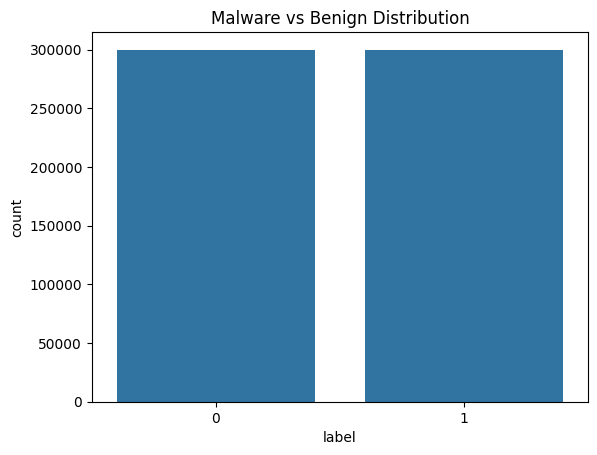

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train_df['label'].value_counts())  # 1 = Malicious, 0 = Benign
sns.countplot(x='label', data=train_df)
plt.title("Malware vs Benign Distribution")
plt.show()


In [ ]:

# Drop all non-numeric columns automatically
X = train_df.select_dtypes(include=['int', 'float', 'bool']).drop(columns=['label', 'sha256','avclass','urls','paths','registry'], errors='ignore')
y = train_df['label']





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X.head()

,numstrings,avlength,printables,entropy,MZ,size,vsize,has_debug,exports_counts,imports_counts,...,optional.minor_image_version,optional.major_linker_version,optional.minor_linker_version,optional.major_operating_system_version,optional.minor_operating_system_version,optional.major_subsystem_version,optional.minor_subsystem_version,optional.sizeof_code,optional.sizeof_headers,optional.sizeof_heap_commit
0,14573,5.972072,87031,6.569898,51,3101705,380928,0,0,156,...,0,7,10,4,0,4,0,26624,1024,4096
1,1803,11.191348,20178,5.797295,3,504320,524288,1,0,619,...,20512,7,10,5,1,4,0,455680,1024,4096
2,1238,12.020194,14881,5.744186,1,180224,180224,1,0,273,...,0,6,0,5,0,4,0,80896,1024,4096
3,11166,5.807899,64851,6.578020,41,2377730,77824,0,0,8,...,0,2,25,1,0,4,0,36864,1024,4096
4,5547,6.043447,33523,6.561550,25,1153808,1167360,1,0,124,...,0,5,12,5,0,4,0,34304,1536,4096


In [ ]:
print(X.columns.tolist())

['numstrings', 'avlength', 'printables', 'entropy', 'MZ', 'size', 'vsize', 'has_debug', 'exports_counts', 'imports_counts', 'has_relocations', 'has_resources', 'has_signature', 'has_tls', 'symbols', 'coff.timestamp', 'optional.major_image_version', 'optional.minor_image_version', 'optional.major_linker_version', 'optional.minor_linker_version', 'optional.major_operating_system_version', 'optional.minor_operating_system_version', 'optional.major_subsystem_version', 'optional.minor_subsystem_version', 'optional.sizeof_code', 'optional.sizeof_headers', 'optional.sizeof_heap_commit']


In [ ]:
# Create LightGBM datasets
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

In [ ]:
# Parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

In [ ]:
# Train with callback-based early stopping
model = lgb.train(params,
                  train_data,
                  valid_sets=[train_data, val_data],
                  num_boost_round=200,
                  callbacks=[lgb.early_stopping(stopping_rounds=20)])

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.18215	valid_1's binary_logloss: 0.186605


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.925975
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     60000
           1       0.92      0.93      0.93     60000

    accuracy                           0.93    120000
   macro avg       0.93      0.93      0.93    120000
weighted avg       0.93      0.93      0.93    120000



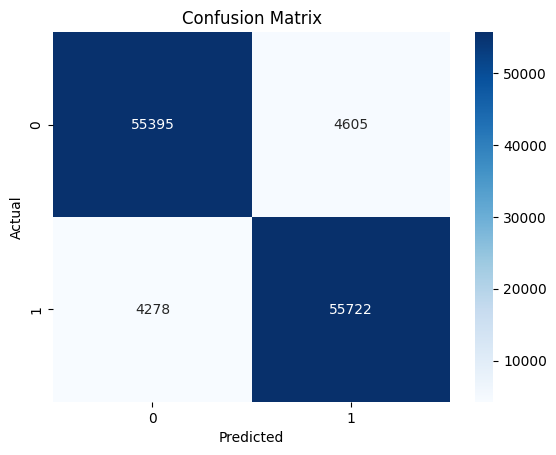

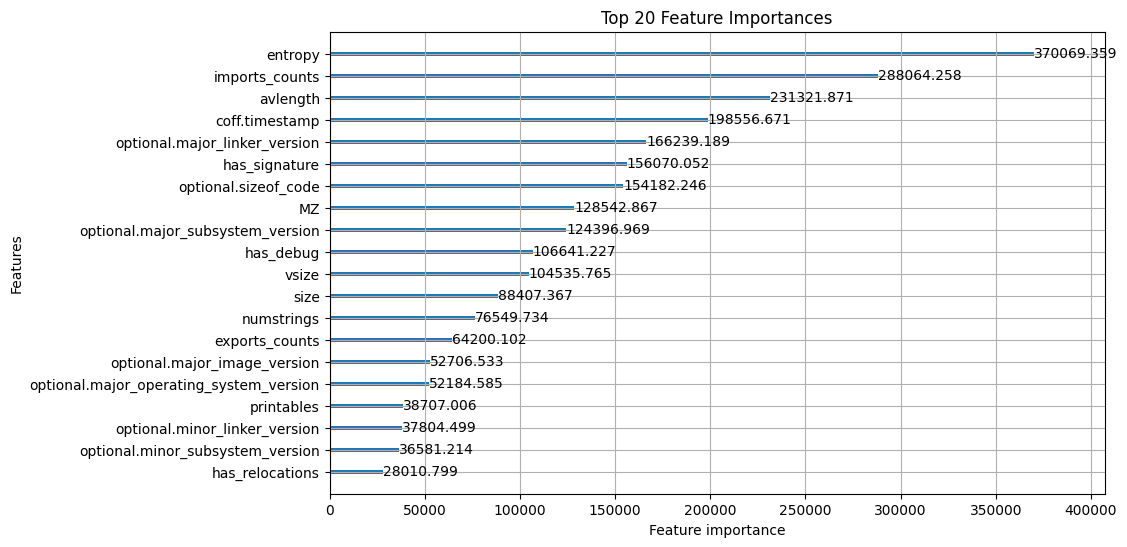

In [ ]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_val, y_pred_binary))
print("Classification Report:\n", classification_report(y_val, y_pred_binary))

sns.heatmap(confusion_matrix(y_val, y_pred_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()


In [ ]:
import pickle

# Save model to a file
with open('new_malware_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Cell 1: Install dependencies
!pip install pefile lief --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.0 MB/s eta 0:00:00


In [ ]:
# Cell 2: Import libraries
import pefile
import lief
import os
import math
import re
import string
from collections import Counter
from datetime import datetime


In [ ]:
# Cell 3: Helper functions

def get_entropy(data):
    if not data:
        return 0.0
    entropy = 0
    for x in range(256):
        p_x = data.count(bytes([x])) / len(data)
        if p_x > 0:
            entropy -= p_x * math.log2(p_x)
    return entropy

def extract_strings(data, min_len=4):
    pattern = rb'[\x20-\x7E]{%d,}' % min_len
    return re.findall(pattern, data)

def is_printable(s):
    return all(chr(c) in string.printable for c in s)

def average_string_length(strings):
    if not strings:
        return 0
    return sum(len(s) for s in strings) / len(strings)


In [ ]:
# Cell 4: Main feature extractor

def extract_pe_features(file_path):
    pe = pefile.PE(file_path)
    lief_pe = lief.parse(file_path)
    data = open(file_path, 'rb').read()
    strings = extract_strings(data)

    features = {}

    opt = pe.OPTIONAL_HEADER

    # Static metadata
    features['numstrings'] = len(strings)
    features['avlength'] = average_string_length(strings)
    features['printables'] = sum([1 for s in strings if is_printable(s)])
    features['entropy'] = get_entropy(data)
    features['MZ'] = int(data[:2] == b'MZ')  # check for MZ header
    features['size'] = os.path.getsize(file_path)
    features['vsize'] = opt.SizeOfImage

    # Flags
    features['has_debug'] = int(hasattr(pe, 'DIRECTORY_ENTRY_DEBUG'))
    #Counts
    features['exports_counts'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols) if hasattr(pe, 'DIRECTORY_ENTRY_EXPORT') else 0
    features['imports_counts'] = len(pe.DIRECTORY_ENTRY_IMPORT) if hasattr(pe, 'DIRECTORY_ENTRY_IMPORT') else 0
    #Flags
    features['has_relocations'] = int(hasattr(pe, 'DIRECTORY_ENTRY_BASERELOC'))
    features['has_resources'] = int(hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'))
    features['has_signature'] = int(hasattr(pe, 'DIRECTORY_ENTRY_SECURITY'))
    features['has_tls'] = int(hasattr(pe, 'DIRECTORY_ENTRY_TLS'))


    # Counts
    features['symbols'] = len(lief_pe.symbols) if lief_pe and lief_pe.symbols else 0

    # COFF + optional header fields
    features['coff.timestamp'] = pe.FILE_HEADER.TimeDateStamp

    features['optional.major_image_version'] = opt.MajorImageVersion
    features['optional.minor_image_version'] = opt.MinorImageVersion
    features['optional.major_linker_version'] = opt.MajorLinkerVersion
    features['optional.minor_linker_version'] = opt.MinorLinkerVersion
    features['optional.major_operating_system_version'] = opt.MajorOperatingSystemVersion
    features['optional.minor_operating_system_version'] = opt.MinorOperatingSystemVersion
    features['optional.major_subsystem_version'] = opt.MajorSubsystemVersion
    features['optional.minor_subsystem_version'] = opt.MinorSubsystemVersion
    features['optional.sizeof_code'] = opt.SizeOfCode
    features['optional.sizeof_headers'] = opt.SizeOfHeaders
    features['optional.sizeof_heap_commit'] = opt.SizeOfHeapCommit

    # Placeholder for unavailable features (you can implement them if needed)
    #features['avclass'] = ''   # requires external AVClass tool or VirusTotal
    #features['paths'] = 0      # requires string-based heuristic (count path-like strings)
    #features['urls'] = 0       # requires regex matching for URLs
    #features['registry'] = 0   # requires regex matching for reg keys

    return features


In [ ]:
file_path = 'malware.exe'

In [ ]:
features = extract_pe_features(file_path)

In [ ]:
import pandas as pd
df = pd.DataFrame([features])
df.T

,0
numstrings,4.225500e+04
avlength,4.683706e+00
printables,4.225500e+04
entropy,7.995471e+00
MZ,1.000000e+00
size,3.514368e+06
vsize,3.514368e+06
has_debug,0.000000e+00
exports_counts,0.000000e+00
imports_counts,4.000000e+00


In [ ]:
 prediction = model.predict(df)
 prediction = 1 if prediction >= 0.5 else 0


label = "Malware" if prediction == 1 else "Benign"
print(f"Prediction: {label}")


Prediction: Malware
